In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from openamundsen.interpolation import idw
from interpolation_optimized import idw_optimized

In [2]:
known_points = xr.open_dataset("known_points.nc").load().set_index(points=("y","x"))
target_points = xr.open_dataset("target_points.nc").load().set_index(points=("y","x"))

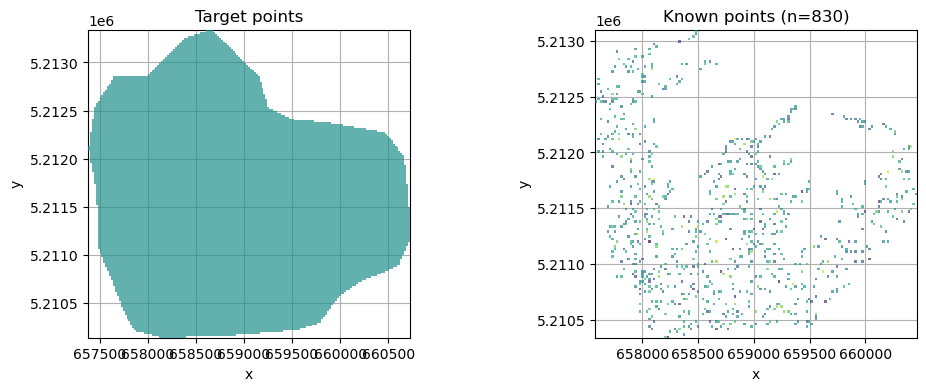

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

target_points["data"] = (
    "points",
    np.ones(target_points.x.size),
)  # dummy variable for plotting
target_points.unstack().data.plot.imshow(
    ax=ax1, add_colorbar=False, zorder=10, alpha=0.7
)
known_points.unstack().temp.plot.imshow(
    ax=ax2, add_colorbar=False, zorder=10, alpha=0.7
)

ax1.set_aspect("equal")
ax2.set_aspect("equal")

ax1.set_title("Target points")
ax2.set_title(f"Known points (n={known_points.points.size})")

ax1.grid(zorder=1)
ax2.grid(zorder=1)

plt.show()

In [4]:
interpolated_weights = idw(
    known_points.x.values,
    known_points.y.values,
    known_points.temp.values,
    target_points.x,
    target_points.y,
)

interpolated_weights_optim = idw_optimized(
    known_points.x.values,
    known_points.y.values,
    known_points.temp.values,
    target_points.x,
    target_points.y,
)

assert np.all(interpolated_weights == interpolated_weights_optim)

In [5]:
%%timeit
interpolated_weights = idw(
    known_points.x.values,
    known_points.y.values,
    known_points.temp.values,
    target_points.x,
    target_points.y,
)

71 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
interpolated_weights = idw_optimized(
    known_points.x.values,
    known_points.y.values,
    known_points.temp.values,
    target_points.x,
    target_points.y,
)

39.2 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Downsample known points to 12 points (an arbitrary low number) to simulate meteorological stations

In [7]:
sample_indices = np.random.default_rng(seed=42).integers(0, known_points.points.size, 12)

In [8]:
known_points_subsampled = known_points.isel(points=sample_indices)

### Plot the sampled indices

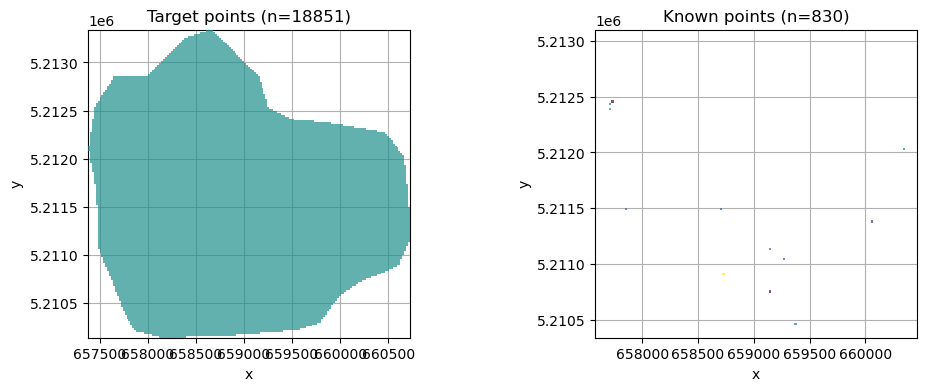

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

target_points["data"] = (
    "points",
    np.ones(target_points.x.size),
)  # dummy variable for plotting
target_points.unstack().data.plot.imshow(
    ax=ax1, add_colorbar=False, zorder=10, alpha=0.7
)
known_points_subsampled.unstack().reindex_like(
    known_points.unstack()
).temp.plot.imshow(ax=ax2, add_colorbar=False, zorder=10, alpha=0.7)

ax1.set_aspect("equal")
ax2.set_aspect("equal")

ax1.set_title(f"Target points (n={target_points.points.size})")
ax2.set_title(f"Known points (n={known_points.points.size})")

ax1.grid(zorder=1)
ax2.grid(zorder=1)

plt.show()

In [10]:
interpolated_weights = idw(
    known_points_subsampled.x.values,
    known_points_subsampled.y.values,
    known_points_subsampled.temp.values,
    target_points.x,
    target_points.y,
)

interpolated_weights_optim = idw_optimized(
    known_points_subsampled.x.values,
    known_points_subsampled.y.values,
    known_points_subsampled.temp.values,
    target_points.x,
    target_points.y,
)

assert np.all(interpolated_weights == interpolated_weights_optim)

In [13]:
%%timeit -n 1000 -r 10
interpolated_weights = idw(
    known_points_subsampled.x.values,
    known_points_subsampled.y.values,
    known_points_subsampled.temp.values,
    target_points.x,
    target_points.y,
)

1.91 ms ± 179 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [14]:
%%timeit -n 1000 -r 10
interpolated_weights = idw_optimized(
    known_points_subsampled.x.values,
    known_points_subsampled.y.values,
    known_points_subsampled.temp.values,
    target_points.x,
    target_points.y,
)

1.13 ms ± 92.5 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
